In [1]:
# Import needed libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
#change this with the path to the dataset
dataset_path = "/Users/moji/dataset_repo/ISO-NY" 

# Get the list of files and directories
files_and_dirs = os.listdir(dataset_path)

ds_list = []
# Print each item
for item in files_and_dirs:
    ds_list.append(item)
    # print(item)

In [3]:
directory_path = "/Users/moji/dataset_repo/ISO-NY/long_ds_2324"
all_dataframes = []

# Iterate through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path, parse_dates=['Time Stamp'])
        
        # Append the DataFrame to the list
        all_dataframes.append(df)

# Concatenate all dataframes into a single large dataframe
big_dataset = pd.concat(all_dataframes, axis=0, ignore_index=True)

In [4]:
big_dataset.head()

,Time Stamp,Time Zone,Name,PTID,Load
0,2023-03-23,EDT,CAPITL,61757,1116.3776
1,2023-03-23,EDT,CENTRL,61754,1449.6877
2,2023-03-23,EDT,DUNWOD,61760,503.1355
3,2023-03-23,EDT,GENESE,61753,892.7252
4,2023-03-23,EDT,HUD VL,61758,911.8589


In [5]:
# Extract unique regions from the 'Name' column
regions = big_dataset['Name'].unique()

# Display the regions
print(regions)

['CAPITL' 'CENTRL' 'DUNWOD' 'GENESE' 'HUD VL' 'LONGIL' 'MHK VL' 'MILLWD'
 'N.Y.C.' 'NORTH' 'WEST']


In [6]:
# Create a dictionary to store DataFrames for each region
region_dfs = {region: big_dataset[big_dataset['Name'] == region] for region in regions}

In [7]:
# Example: Access the DataFrame for the 'NYC' region
nyc_df = region_dfs['N.Y.C.']
# Sort the dataframe by the 'date' column
nyc_df = nyc_df.sort_values(by='Time Stamp')
nyc_df = nyc_df.ffill()
# reset the index after sorting
nyc_df = nyc_df.reset_index(drop=True)
nyc_df['Time Stamp'] = pd.to_datetime(nyc_df['Time Stamp'])
nyc_df = nyc_df.set_index('Time Stamp')
nyc_df

,Time Zone,Name,PTID,Load
Time Stamp,,,,
2023-01-01 00:00:00,EST,N.Y.C.,61761,4697.4350
2023-01-01 00:05:00,EST,N.Y.C.,61761,4650.1590
2023-01-01 00:10:00,EST,N.Y.C.,61761,4650.5225
2023-01-01 00:15:00,EST,N.Y.C.,61761,4635.6167
2023-01-01 00:20:00,EST,N.Y.C.,61761,4625.3135
...,...,...,...,...
2024-08-30 12:35:00,EDT,N.Y.C.,61761,6543.8740
2024-08-30 12:40:00,EDT,N.Y.C.,61761,6634.0700
2024-08-30 12:45:00,EDT,N.Y.C.,61761,6632.9077


In [8]:
nyc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PTID,178430.0,61761.000000,0.000000,61761.0000,61761.00000,61761.00000,61761.00000,61761.000
Load,178430.0,5655.014029,1183.242454,3682.7292,4810.68875,5490.83595,6167.03645,10429.561


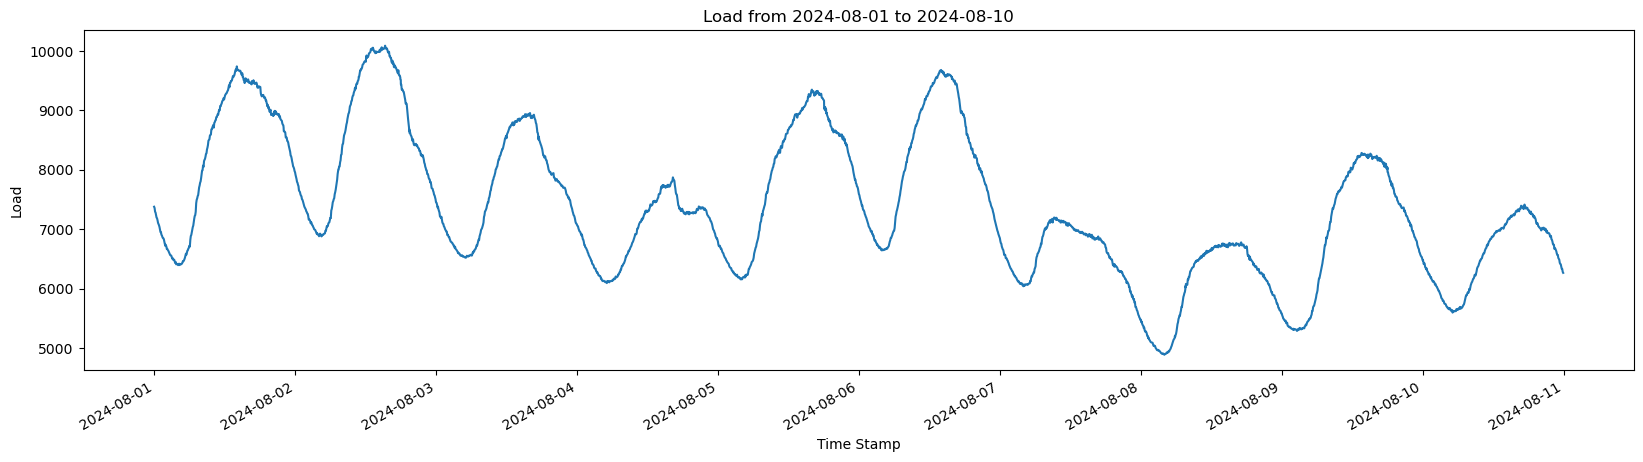

In [9]:
# Define the start and end times for the specific period
start_time = '2024-08-01'
end_time = '2024-08-10'

# Filter the Series for the specific time period
specific_period_df = nyc_df[start_time:end_time]

# Plot the filtered data
plt.figure(figsize=(20, 5))
specific_period_df['Load'].plot()
plt.xlabel('Time Stamp')
plt.ylabel('Load')
plt.title('Load from {} to {}'.format(start_time, end_time))
plt.show()

In [10]:
nyc_df_hourly = nyc_df['Load'].resample('15min').max()
nyc_df_hourly = nyc_df_hourly.fillna(method='ffill')


/var/folders/0s/whfbkk11083fmvg1wl2nrqqm0000gn/T/ipykernel_39691/2596120766.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_df_hourly = nyc_df_hourly.fillna(method='ffill')


In [11]:
nyc_df_hourly[0:5]

Time Stamp
2023-01-01 00:00:00    4697.4350
2023-01-01 00:15:00    4635.6167
2023-01-01 00:30:00    4608.4720
2023-01-01 00:45:00    4559.2705
2023-01-01 01:00:00    4514.1787
Freq: 15min, Name: Load, dtype: float64

In [12]:
nyc_df_hourly.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 58324 entries, 2023-01-01 00:00:00 to 2024-08-30 12:45:00
Freq: 15min
Series name: Load
Non-Null Count  Dtype  
--------------  -----  
58324 non-null  float64
dtypes: float64(1)
memory usage: 911.3 KB


In [13]:
# Check for NaNs in the DataFrame
nan_check = nyc_df_hourly.isna()
nan_count = nyc_df_hourly.isna().sum().sum()
nan_count

0

In [14]:
nyc_df_hourly.shape, nyc_df.shape

((58324,), (178430, 4))

In [15]:
nyc_df.shape[0] / nyc_df_hourly.shape[0]

3.059289486317811

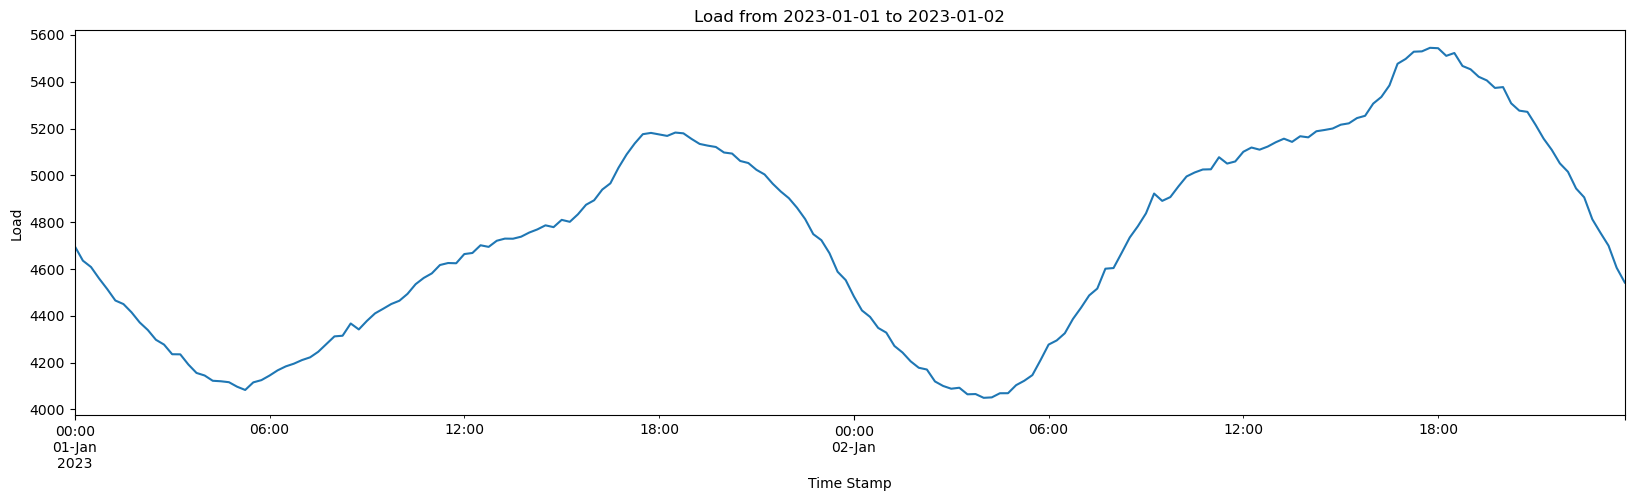

In [16]:
# Define the start and end times for the specific period
start_time = '2023-01-01'
end_time = '2023-01-02'

# Filter the Series for the specific time period
specific_period_df = nyc_df_hourly[start_time:end_time]

# Plot the filtered data
plt.figure(figsize=(20, 5))
specific_period_df.plot()
plt.xlabel('Time Stamp')
plt.ylabel('Load')
plt.title('Load from {} to {}'.format(start_time, end_time))
plt.show()


In [17]:
import pmdarima as pm
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error
from pmdarima.model_selection import SlidingWindowForecastCV

In [18]:
# Forecasting horizons
forecast_horizons = [1, 3, 6, 12]

In [19]:
# Function to perform time series cross-validation
def time_series_cv(data, forecast_horizon):
    cv = SlidingWindowForecastCV(window_size=len(data) - forecast_horizon,
                                 h=forecast_horizon,
                                 step=1)
    
    errors = []
    
    for train_idx, test_idx in cv.split(data):
        train, test = data.iloc[train_idx], data.iloc[test_idx]
        
        # Fit the auto_arima model
        model = auto_arima(train, seasonal=False, trace=False, suppress_warnings=True)
        
        # Forecast
        forecast = model.predict(n_periods=forecast_horizon)
        
        # Calculate error (e.g., MAE)
        error = mean_absolute_error(test, forecast)
        errors.append(error)
    
    return np.mean(errors)

In [20]:
# Evaluate the model on different forecast horizons
results = {}
for horizon in forecast_horizons:
    mae = time_series_cv(nyc_df_hourly, horizon)
    results[f'Horizon {horizon}'] = mae

In [21]:
# Display the results
for horizon, mae in results.items():
    print(f'{horizon} steps ahead: MAE = {mae:.4f}')

Horizon 1 steps ahead: MAE = 19.3705
Horizon 3 steps ahead: MAE = 12.7844
Horizon 6 steps ahead: MAE = 13.7493
Horizon 12 steps ahead: MAE = 103.1278


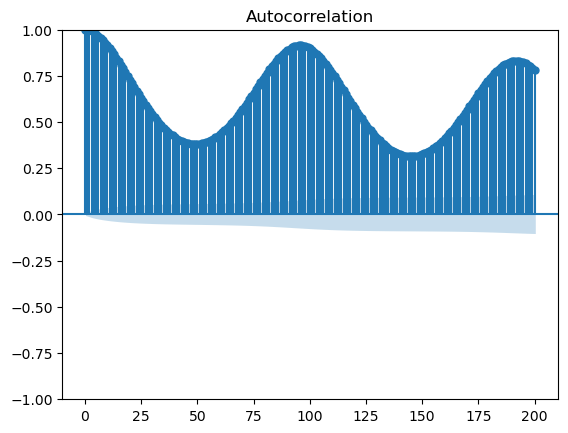

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

# Assume `time_series_data` is a pandas Series of your time series
plot_acf(nyc_df_hourly, lags=200)
plt.show()

In [31]:

from pmdarima.model_selection import train_test_split
y = nyc_df_hourly
y_train, y_test = train_test_split(y, test_size=0.2)
y_train.shape, y_test.shape

((46659,), (11665,))

In [ ]:
# Split 70:20:10 (train:validation:test)
train_df = df_seconds[0:int(n*0.7)]
val_df = df_seconds[int(n*0.7):int(n*0.9)]
test_df = df_seconds[int(n*0.9):]
train_df.shape, val_df.shape, test_df.shape

In [7]:
new_path = os.path.join(dataset_path,ds_list[0]) #change this to ds_list[1] for the other file
a = os.listdir(new_path)
a[0]

'20240620pal.csv'

In [8]:
ds_path = os.path.join(new_path,a[0])
ds_path

'/Users/moji/dataset_repo/ISO-NY/20240601pal_csv/20240620pal.csv'

In [9]:
df = pd.read_csv(ds_path, parse_dates=['Time Stamp'])
df

,Time Stamp,Time Zone,Name,PTID,Load
0,2024-06-20 00:00:00,EDT,CAPITL,61757,1800.4473
1,2024-06-20 00:00:00,EDT,CENTRL,61754,2165.7850
2,2024-06-20 00:00:00,EDT,DUNWOD,61760,793.1893
3,2024-06-20 00:00:00,EDT,GENESE,61753,1539.0667
4,2024-06-20 00:00:00,EDT,HUD VL,61758,1364.1179
...,...,...,...,...,...
3251,2024-06-20 23:55:00,EDT,MHK VL,61756,983.3492
3252,2024-06-20 23:55:00,EDT,MILLWD,61759,397.0832
3253,2024-06-20 23:55:00,EDT,N.Y.C.,61761,7202.8280
3254,2024-06-20 23:55:00,EDT,NORTH,61755,659.9377


In [10]:
# Extract unique regions from the 'Name' column
regions = df['Name'].unique()

# Display the regions
print(regions)

['CAPITL' 'CENTRL' 'DUNWOD' 'GENESE' 'HUD VL' 'LONGIL' 'MHK VL' 'MILLWD'
 'N.Y.C.' 'NORTH' 'WEST']


In [13]:
# Create a dictionary to store DataFrames for each region
region_dfs = {region: df[df['Name'] == region] for region in regions}
region_dfs.keys()

dict_keys(['CAPITL', 'CENTRL', 'DUNWOD', 'GENESE', 'HUD VL', 'LONGIL', 'MHK VL', 'MILLWD', 'N.Y.C.', 'NORTH', 'WEST'])

In [14]:
# Example: Access the DataFrame for the 'CAPITL' region
capitl_df = region_dfs['CAPITL']

capitl_df

,Time Stamp,Time Zone,Name,PTID,Load
0,2024-06-20 00:00:00,EDT,CAPITL,61757,1800.4473
11,2024-06-20 00:05:00,EDT,CAPITL,61757,1778.7690
22,2024-06-20 00:10:00,EDT,CAPITL,61757,1698.3510
33,2024-06-20 00:15:00,EDT,CAPITL,61757,1683.1027
44,2024-06-20 00:20:00,EDT,CAPITL,61757,1768.4634
...,...,...,...,...,...
3201,2024-06-20 23:35:00,EDT,CAPITL,61757,1754.4366
3212,2024-06-20 23:40:00,EDT,CAPITL,61757,1758.3104
3223,2024-06-20 23:45:00,EDT,CAPITL,61757,1721.9150
3234,2024-06-20 23:50:00,EDT,CAPITL,61757,1721.3713


In [20]:
name = a[0].split(".")[0]

'20240620pal'

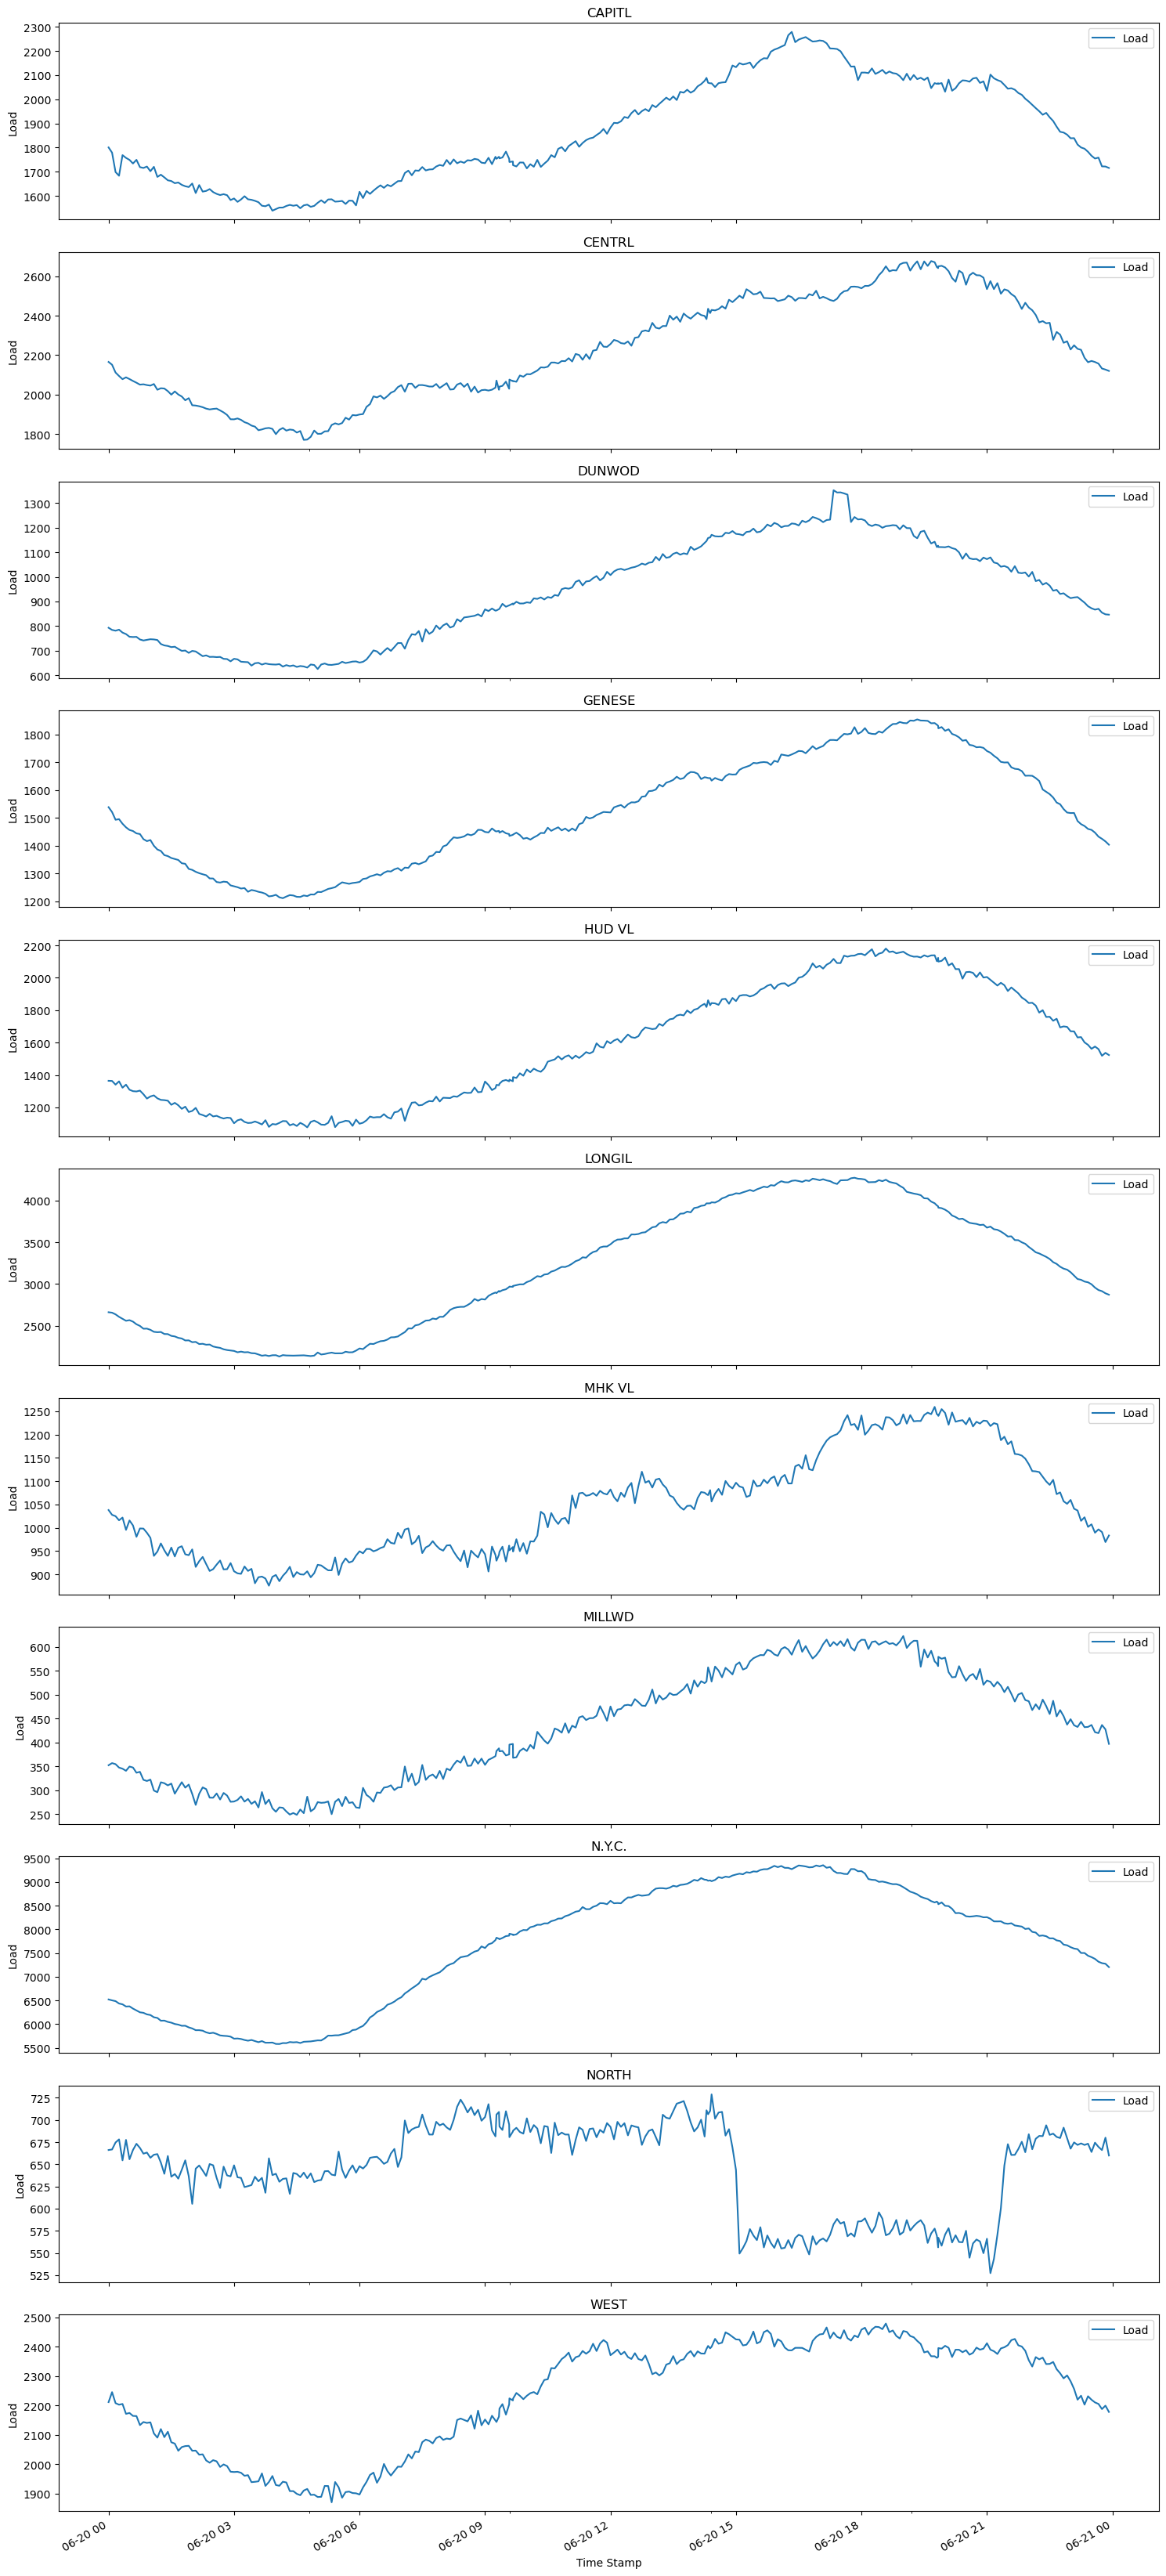

In [25]:
# Number of regions
num_regions = len(region_dfs)

# Create subplots
fig, axes = plt.subplots(num_regions, 1, figsize=(15, 3 * num_regions), sharex=True)

# If there's only one region, `axes` won't be an array, so we wrap it in a list
if num_regions == 1:
    axes = [axes]

# Plot each DataFrame on a separate axis
for ax, (region, data) in zip(axes, region_dfs.items()):
    data.plot(x='Time Stamp', y='Load', ax=ax, title=region)
    ax.set_ylabel('Load')

# Set a common label for the x-axis
plt.xlabel('Time Stamp')
plt.tight_layout()
plt.show()